# Задание "Функции потерь и оптимизация"

- Реализовать самостоятельно логистическую регрессию
- Обучить ее методом градиентного спуска
- Методом nesterov momentum
- Методом rmsprop

**Дополнительное задание***

*В качестве dataset’а взять Iris, оставив 2 класса:*
- *Iris Versicolor*
- *Iris Virginica*

## Решение

In [1]:
import pandas
import numpy
from sklearn.datasets import load_iris
from matplotlib import pyplot

#### Подготовка данных

In [2]:
def get_iris_data():
    iris = load_iris()
    iris_data = pandas.DataFrame(iris.data)
    iris_data['class'] = iris.target
    target_names = iris.target_names
    
    iris_data.columns = [
        'sepal_len', 
        'sepal_wid', 
        'petal_len', 
        'petal_wid', 
        'class'
    ]
    
    iris_data = iris_data.loc[
        (iris_data['class'] == 1) | (iris_data['class'] == 2)
    ]

    iris_data.dropna(
        how="all", 
        inplace=True)
    
    return iris_data.reset_index()

iris_data = get_iris_data()
iris_data.head()

,index,sepal_len,sepal_wid,petal_len,petal_wid,class
0,50,7.0,3.2,4.7,1.4,1
1,51,6.4,3.2,4.5,1.5,1
2,52,6.9,3.1,4.9,1.5,1
3,53,5.5,2.3,4.0,1.3,1
4,54,6.5,2.8,4.6,1.5,1


### Реализовать самостоятельно логистическую регрессию

Формула логистической регрессис

$L = X_{0} + w_{1}X_{1} + w_{2}X_{2} + ... + w_{n}X_{n}$

$p = { 
    1
    \over 
    1 + e^-L
}$

In [3]:
import math

class IrisLogisticRegression:
    
    def __init__(self):
        self.__weight = numpy.array([])
        self.__losses = numpy.array([])
        self.__offset = 0
    
    # Privet functions #
    
    def __sigmoid(self, L):
        return 1 / (1 + math.e ** -L)
    
    def __loss(self, logistic_regression, y_values):
        return -(y_values * numpy.log(logistic_regression) + (1 - y_values) * numpy.log(1 - logistic_regression)).mean()

    # Public functions #
    
    def get_losses(self):
        return self.__losses
    
    def fit(self, x_values, y_values, epochs, learning_rate, speed_type='default'):
        x_values = x_values.to_numpy()
        y_values = y_values.to_numpy()

        # Инициализируем веса и смещение
        self.__weight = numpy.zeros(x_values.shape[1])
        self.__losses = []
        self.__offset = 0
        
        values_count = y_values.shape[0]
        
        # Для nesterov_momentum
        prev_v_w = 0
        prev_v_b = 0
          
        # Для rmsprop
        grad_squared = 0
        
        for _ in range(epochs):
             # Находим регрессию
            L = self.__offset + numpy.dot(x_values, self.__weight)
            logisticRegression = self.__sigmoid(L)
            
            # Находим градиент
            dZ = logisticRegression - y_values 
            dW = numpy.dot(x_values.T, dZ) / values_count
            dB = numpy.sum(dZ) / values_count
            
            if speed_type == 'nesterov_momentum':
                eta = 0.1
                momentum = 0.9
                
                v_w = momentum * prev_v_w + eta * dW
                v_b = momentum * prev_v_b + eta * dB
                
                # Обновляем веса
                self.__weight -= v_w
                self.__offset -= v_b
                prev_v_w = v_w
                prev_v_b = v_b
                
            elif speed_type == 'rmsprop':
                grad_squared += dW * dW
                
                # Обновляем веса
                self.__weight -= (learning_rate / numpy.sqrt(grad_squared)) * dW
                self.__offset -= learning_rate * dB
                
            else:
                # Обновляем веса
                self.__weight -= learning_rate * dW
                self.__offset -= learning_rate * dB
            
            # Находим ошибки
            loss = self.__loss(logisticRegression, y_values)
            self.__losses = numpy.append(self.__losses, loss)
                
        
    def predict(self, x_values):
        x_values = x_values.to_numpy()
       
        L = numpy.dot(x_values, self.__weight)
        logisticRegression = self.__sigmoid(L)
        
        logisticRegression = logisticRegression >= 0.5
        y_pred = []

        for i in range(len(logisticRegression)):
            if logisticRegression[i] == True: 
                y_pred.append(1)
            else:
                y_pred.append(0)
                
        return numpy.array(y_pred)

In [4]:
def get_accuracy(y_values, y_predict_values):
    loss_count = 0
    
    for item_1, item_2  in zip(y_predict_values, y_values):
        if item_1 != item_2: loss_count += 1
            
    return 1 - loss_count / len(y_values)

In [5]:
from sklearn.model_selection import train_test_split

x_values = iris_data[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']]
y_values = iris_data['class'] - 1

X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2)

accuracy: 0.9


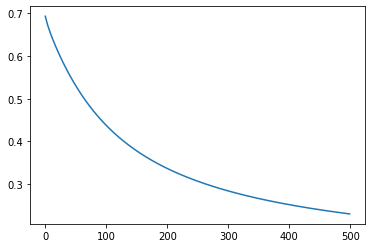

In [6]:
irisLogisticRegression = IrisLogisticRegression()

irisLogisticRegression.fit(
    x_values=X_train, 
    y_values=y_train,
    epochs=500, 
    learning_rate=0.1)

y_pred = irisLogisticRegression.predict(X_test)
print('accuracy:', get_accuracy(y_test, y_pred))

pyplot.plot(irisLogisticRegression.get_losses())
pyplot.show()

accuracy: 0.9


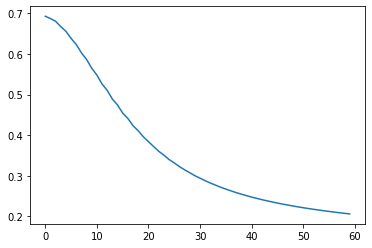

In [7]:
irisLogisticRegression = IrisLogisticRegression()


irisLogisticRegression.fit(
    x_values=X_train, 
    y_values=y_train,
    epochs=60, 
    learning_rate=0.1,
    speed_type='nesterov_momentum')

y_pred = irisLogisticRegression.predict(X_test)
print('accuracy:', get_accuracy(y_test, y_pred))

pyplot.plot(irisLogisticRegression.get_losses())
pyplot.show()

accuracy: 0.7


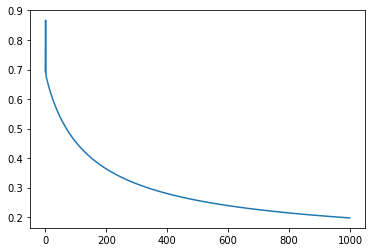

In [8]:
irisLogisticRegression = IrisLogisticRegression()

irisLogisticRegression.fit(
    x_values=X_train, 
    y_values=y_train,
    epochs=1000, 
    learning_rate=0.1,
    speed_type='rmsprop')

y_pred = irisLogisticRegression.predict(X_test)
print('accuracy:', get_accuracy(y_test, y_pred))

pyplot.plot(irisLogisticRegression.get_losses())
pyplot.show()